- 머신러닝/딥러닝 문제해결 프로세스: 크게 ‘경진대회 이해’ → ‘탐색적 데이터 분석’ → ‘베이스라인 모델’ → ‘성능 개선’ 순으로 진행

- 타깃값 변환: 타깃값이 정규분포에 가까울수록 회귀 모델의 성능이 좋음. 한쪽으로 치우친 타깃값은 로그변환하면 정규분포에 가까워지고, 결괏값을 지수변환하면 원래 타깃값 형태로 복원됨.
- 이상치 제거: 훈련 데이터에서 이상치를 제거하면 일반화 성능이 좋아질 수 있음
- 파생 피처 추가: 기존 피처를 분해/조합하여 모델링에 도움되는 새로운 피처를 만들 수 있음
- 피처 제거: 반대로 불필요한 피처를 제거하면 성능도 좋아지고, 훈련 속도도 빨라짐
선형회귀, 릿지, 라쏘 모델: 회귀 문제를 푸는 대표적인 모델, but 너무 기본적이라 실전에서 단독으로 최상의 성능을 기대하기는 어려움
- 랜덤 포레스트 회귀 모델: 여러 모델을 묶어 (대체로) 더 나은 성능을 이끌어내는 간단하고 유용한 기법입니다.
- 그리드서치: 교차 검증으로 최적의 하이퍼파라미터 값을 찾아주는 기법


In [27]:
!unzip /content/bike-sharing-demand.zip

Archive:  /content/bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [28]:
import numpy as np
import pandas as pd

In [29]:
train, test = pd.read_csv('/content/train.csv'), pd.read_csv('/content/test.csv')

In [30]:
train.shape , test.shape

((10886, 12), (6493, 9))

In [31]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [33]:
pd.read_csv('/content/sampleSubmission.csv').head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [34]:
# 결측치 확인
train.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [35]:
# 수치형 데이터와 범주형 데이터 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [36]:
print(train['datetime'][0])
print(train['datetime'][0].split())
print(train['datetime'][0].split()[0])
print(train['datetime'][0].split()[1])

2011-01-01 00:00:00
['2011-01-01', '00:00:00']
2011-01-01
00:00:00


In [37]:
# 문자열데이터를 년 월 일로 분리
# train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# pd.to_datetime(train['datetime']).dt.year
# pd.to_datetime(train['datetime']).dt.month
# pd.to_datetime(train['datetime']).dt.day
# pd.to_datetime(train['datetime']).dt.hour
# pd.to_datetime(train['datetime']).dt.minute
# pd.to_datetime(train['datetime']).dt.second

파생변수

In [64]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['date'] = train['datetime'].dt.date
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday
train['weekday_name'] = train['datetime'].dt.day_name()
train['season_name'] = train['season'].map({1:'봄', 2:'여름', 3:'가을', 4:'겨울'})
train['weather_name'] = train['weather'].map({1:'맑음', 2:'구름 조금', 3:'약한눈비천둥', 4:'강한눈비천둥'})
train['workingday_name'] = train['workingday'].map({0:'공휴일', 1:'근무일'})

In [108]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['date'] = test['datetime'].dt.date
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['weekday'] = test['datetime'].dt.weekday
test['weekday_name'] = test['datetime'].dt.day_name()
test['season_name'] = test['season'].map({1:'봄', 2:'여름', 3:'가을', 4:'겨울'})
test['weather_name'] = test['weather'].map({1:'맑음', 2:'구름 조금', 3:'약한눈비천둥', 4:'강한눈비천둥'})
test['workingday_name'] = test['workingday'].map({0:'공휴일', 1:'근무일'})

시각화

<ipython-input-72-c740606a2e8c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'])


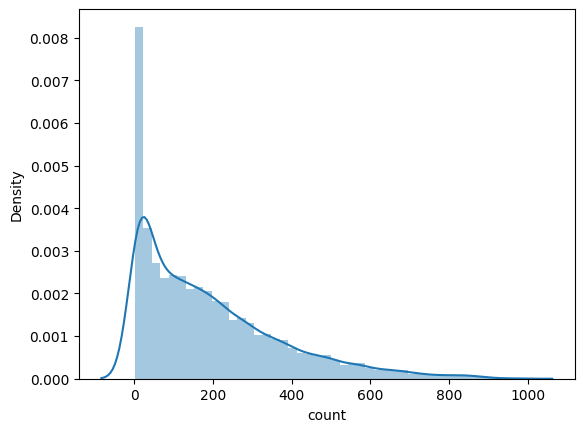

In [72]:
# 분포도 - 정답  데이턴편향여부 확인
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train['count'])
plt.show()

회귀 문제는 데이터가 정규분포형태를 취하면 예측율이높다 - 특성이 골고루 반영되서 학습에 유리함

<ipython-input-75-de0344519b82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['count']))


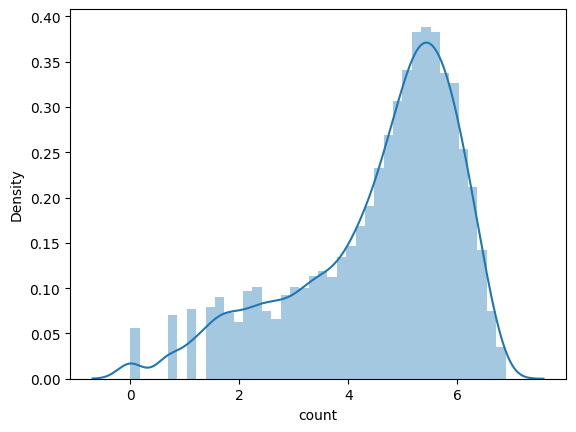

In [75]:
import numpy as np
sns.distplot(np.log(train['count']))
plt.show()

이상치 제거

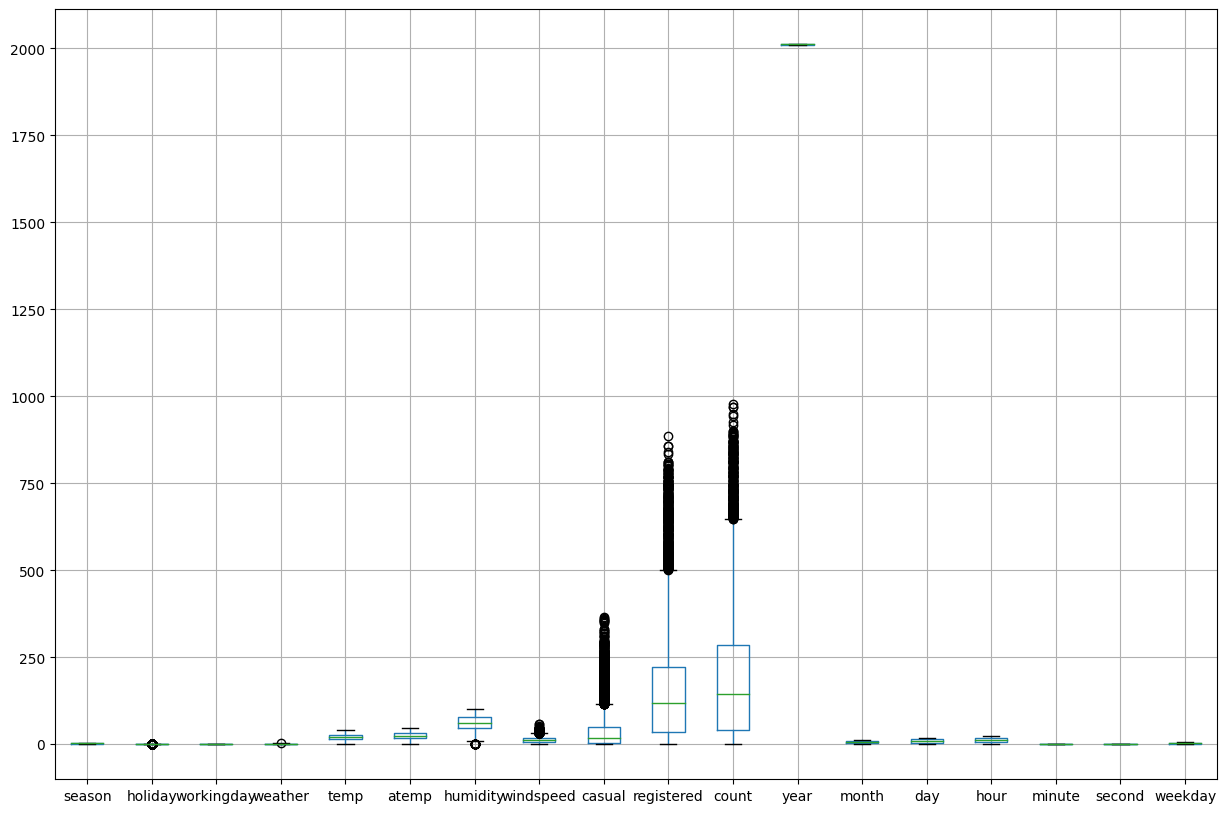

In [76]:
# 전체 컬럼에 대한 boxplot으로 이상치 존재 유무 확인
train.boxplot(figsize=(15,10))
plt.show()

In [79]:
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585


IQR를 이용한 이상치 탐지
  - IQR = Q3 - Q1
  -  Q1 + 1.5*IQR
  -  Q3 + 1.5*IQR

In [94]:
# 수치형 열만 선택해서 사분위수를 구하고 이상치가 있을법한 컬럼을 조회한다

numeric_data = train.select_dtypes(exclude='object')
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))
# 이상치가 있는 데이터
train[outliers.any(axis=1)]
# 이상치가 있는 열
columns_with_outliers = outliers.any(axis=0)
outlier_columns = columns_with_outliers.index.tolist()

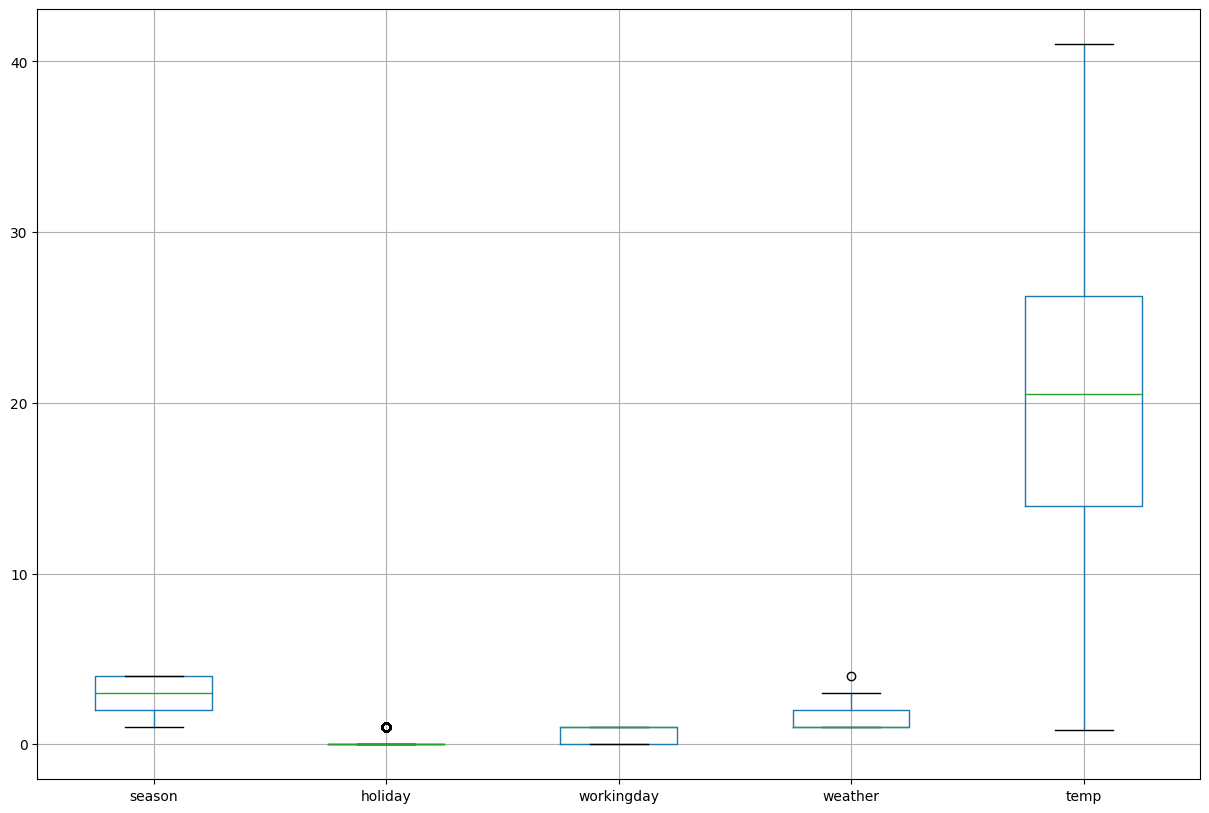

In [101]:
# datetime 은 빠진다
train[outlier_columns[1:6]].boxplot(figsize=(15,10))
plt.show()

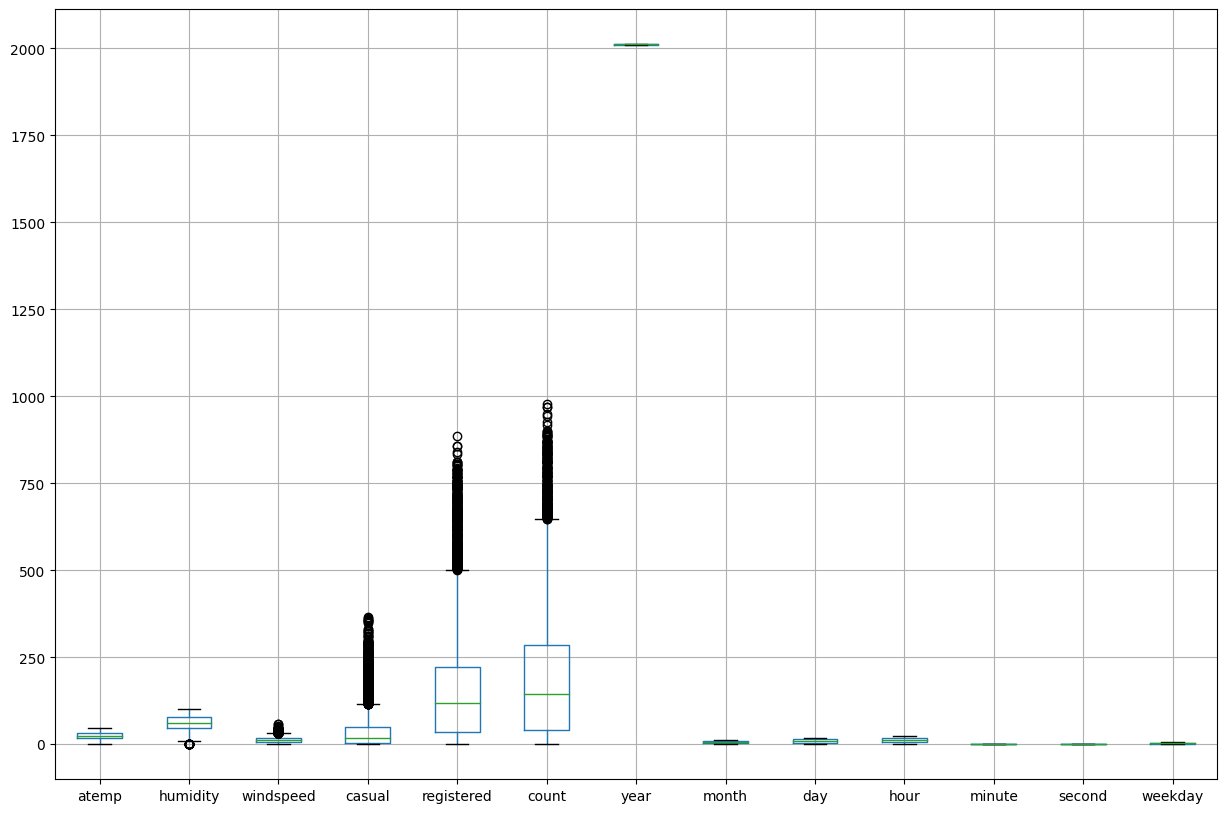

In [102]:
train[outlier_columns[6:]].boxplot(figsize=(15,10))
plt.show()

이상치로 weather로 판단

In [109]:
train['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859


In [110]:
# 1과 다른값편차가 너무 크다. 그래서 4를 제거
train = train[train['weather'] != 4]

학습을 위해서는 데이터를 최대한 확보
  - 학습용 - 테스트용을 합칠수 있음

In [111]:
all_data_temp = pd.concat([train, test],axis=0)
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,day,hour,minute,second,date,weekday,weekday_name,season_name,weather_name,workingday_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,...,1,0,0,0,2011-01-01,5,Saturday,봄,맑음,공휴일
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,...,1,1,0,0,2011-01-01,5,Saturday,봄,맑음,공휴일
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,...,1,2,0,0,2011-01-01,5,Saturday,봄,맑음,공휴일
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,...,1,3,0,0,2011-01-01,5,Saturday,봄,맑음,공휴일
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,...,1,4,0,0,2011-01-01,5,Saturday,봄,맑음,공휴일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,...,31,19,0,0,2012-12-31,0,Monday,봄,구름 조금,근무일
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,...,31,20,0,0,2012-12-31,0,Monday,봄,구름 조금,근무일
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,...,31,21,0,0,2012-12-31,0,Monday,봄,맑음,근무일
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,...,31,22,0,0,2012-12-31,0,Monday,봄,맑음,근무일


필요없는 피처 제거
  - 파생변수 생성할때 만든 피처는 제거
  - 파생변수의 특성으로 분리했기때문에 비슷한 속성이 있으서 서로 간섭현상을 막기위해서

In [140]:
all_data = all_data_temp.drop(['datetime', 'date','casual', 'registered', 'count'], axis=1)

In [141]:
all_data.select_dtypes(exclude='number')

,weekday_name,season_name,weather_name,workingday_name
0,Saturday,봄,맑음,공휴일
1,Saturday,봄,맑음,공휴일
2,Saturday,봄,맑음,공휴일
3,Saturday,봄,맑음,공휴일
4,Saturday,봄,맑음,공휴일
...,...,...,...,...
6488,Monday,봄,구름 조금,근무일
6489,Monday,봄,구름 조금,근무일
6490,Monday,봄,맑음,근무일
6491,Monday,봄,맑음,근무일


In [142]:
# 범주형 데이터를 label encoding
from sklearn.preprocessing import LabelEncoder
ft = LabelEncoder()

In [143]:
all_data.select_dtypes(exclude='number').apply(ft.fit_transform)

,weekday_name,season_name,weather_name,workingday_name
0,2,2,2,0
1,2,2,2,0
2,2,2,2,0
3,2,2,2,0
4,2,2,2,0
...,...,...,...,...
6488,1,2,1,1
6489,1,2,1,1
6490,1,2,2,1
6491,1,2,2,1


In [144]:
all_data[all_data.select_dtypes(exclude='number').columns] = all_data.select_dtypes(exclude='number').apply(ft.fit_transform)

In [145]:
all_data.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,weekday,weekday_name,season_name,weather_name,workingday_name
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0,5,2,2,2,0


In [146]:
all_data_temp['count']

,count
0,16.0
1,40.0
2,32.0
3,13.0
4,1.0
...,...
6488,NaN
6489,NaN
6490,NaN
6491,NaN


In [149]:
# 정답에 있는 na 데이터 빼기
notnullindex = ~all_data_temp['count'].isnull()
X_train = all_data[notnullindex]
y_train = all_data_temp['count'][notnullindex]

In [150]:
X_train.shape, y_train.shape

((10885, 19), (10885,))

모델 훈련

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

평가지표 함수

In [155]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [156]:
# 타깃값을 로그변환
log_y_train = np.log(y_train)

In [157]:
# 데이터 분리해서 학습하고 평가
X_tr, X_val, y_tr, y_val = train_test_split(X_train, log_y_train, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_tr, y_tr)
log_y = model.predict(X_val)
rmsle(y_val, log_y)

1.0185872849488198

성능개선
  - 모델변경
    - 릿지
    - 라쏘
    - 랜덤포레스트